In [2]:
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Импорт и первичный анализ данных

In [3]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

Посмотрим на наши данные. Видим достаточно большое количество пропущенных знаний, некоторые столбцы в df_test отсутствуют.

In [4]:
print('Обучающая выборка')
df_train.info()
print('*'*100)
print('Тестовая выборка')
df_test.info()
print('*'*100)
print('Полный датасет')
df_full.info()

Обучающая выборка
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 

In [5]:
print('Обучающая выборка')
display(df_train.head(3))
print('*'*100)
print('Тестовая выборка')
display(df_test.head(3))
print('*'*100)
print('Полный датасет')
display(df_full.head(3))

Обучающая выборка


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


****************************************************************************************************
Тестовая выборка


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


****************************************************************************************************
Полный датасет


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [6]:
# сохраним изначальное количество объектов для проверки потери данных
df_train_before = df_train.shape[0]

## Предобработка данных

Сразу приведем названия полей к более удобному виду.

In [7]:
df_train.columns = df_train.columns.str.replace('.','_')
df_test.columns = df_test.columns.str.replace('.','_')
df_full.columns = df_full.columns.str.replace('.','_')

Посмотрим на общую картину по пропущенным значениям в полях.

In [8]:
def search_na(df):
        
    dict = {}
        
    for column in df:
        if df[column].isna().sum() > 0:
            dict[column] = df[column].isna().sum()
                
    dict = {k: v for k, v in sorted(dict.items(), key=lambda item: item[1], reverse=True)}
    display(dict)
        
    na_perc = df.isna().any(axis=1).sum() / df.shape[0]
    display(f'Общий % строк с пропусками: {na_perc:.2%}')
        
    display('*'*100)

In [9]:
search_na(df_train)

search_na(df_test)

search_na(df_full)

{'secondary_cleaner_output_tail_sol': 1605,
 'rougher_state_floatbank10_e_air': 436,
 'rougher_input_floatbank11_xanthate': 428,
 'primary_cleaner_output_concentrate_sol': 286,
 'secondary_cleaner_state_floatbank2_a_air': 217,
 'final_output_concentrate_sol': 211,
 'rougher_input_feed_size': 144,
 'final_output_tail_pb': 100,
 'primary_cleaner_input_xanthate': 100,
 'rougher_input_feed_pb': 100,
 'primary_cleaner_output_concentrate_pb': 86,
 'rougher_input_feed_sol': 78,
 'primary_cleaner_output_tail_sol': 46,
 'rougher_input_floatbank11_sulfate': 36,
 'primary_cleaner_input_depressant': 32,
 'rougher_input_floatbank10_sulfate': 29,
 'rougher_output_concentrate_sol': 22,
 'secondary_cleaner_state_floatbank2_b_air': 21,
 'primary_cleaner_input_sulfate': 20,
 'primary_cleaner_output_tail_pb': 15,
 'secondary_cleaner_output_tail_pb': 10,
 'rougher_input_feed_rate': 8,
 'rougher_input_floatbank10_xanthate': 8,
 'secondary_cleaner_state_floatbank4_a_air': 6,
 'final_output_tail_sol': 5,
 'p

'Общий % строк с пропусками: 22.14%'

'****************************************************************************************************'

{'rougher_input_floatbank11_xanthate': 25,
 'rougher_input_feed_sol': 21,
 'secondary_cleaner_state_floatbank3_a_air': 9,
 'rougher_input_floatbank11_sulfate': 8,
 'primary_cleaner_input_depressant': 5,
 'rougher_input_floatbank10_sulfate': 5,
 'primary_cleaner_input_sulfate': 4,
 'primary_cleaner_input_xanthate': 4,
 'rougher_input_feed_rate': 3,
 'secondary_cleaner_state_floatbank2_a_air': 3,
 'secondary_cleaner_state_floatbank2_b_air': 2,
 'rougher_input_feed_size': 1}

'Общий % строк с пропусками: 1.15%'

'****************************************************************************************************'

{'secondary_cleaner_output_tail_sol': 1748,
 'rougher_input_floatbank11_xanthate': 453,
 'rougher_state_floatbank10_e_air': 436,
 'primary_cleaner_output_concentrate_sol': 370,
 'secondary_cleaner_state_floatbank2_a_air': 220,
 'final_output_concentrate_sol': 211,
 'rougher_input_feed_size': 145,
 'primary_cleaner_output_concentrate_pb': 116,
 'primary_cleaner_input_xanthate': 104,
 'final_output_tail_pb': 101,
 'rougher_input_feed_pb': 100,
 'rougher_input_feed_sol': 99,
 'primary_cleaner_output_tail_sol': 62,
 'rougher_input_floatbank11_sulfate': 44,
 'primary_cleaner_input_depressant': 37,
 'rougher_input_floatbank10_sulfate': 34,
 'primary_cleaner_input_sulfate': 24,
 'rougher_output_concentrate_sol': 23,
 'secondary_cleaner_state_floatbank2_b_air': 23,
 'primary_cleaner_output_tail_pb': 21,
 'secondary_cleaner_state_floatbank3_a_air': 13,
 'secondary_cleaner_output_tail_pb': 12,
 'rougher_input_feed_rate': 11,
 'rougher_input_floatbank10_xanthate': 8,
 'final_output_tail_sol': 6,


'Общий % строк с пропусками: 17.21%'

'****************************************************************************************************'

Соседние строчки в датасете похожи по значениям. Воспользуемся этим для заполнения пропусков.

In [10]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

Проверим дубликаты строк.

In [11]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())

0
0
0


Проверим правильность вычисления коэффициента обогащения. Добавим новый столбец с рассчитанными данными.

In [12]:
df_train['rougher_recovery_calculated'] = (
    (df_train['rougher_output_concentrate_au'] * (df_train['rougher_input_feed_au'] - df_train['rougher_output_tail_au'])) / 
    (df_train['rougher_input_feed_au'] * (df_train['rougher_output_concentrate_au'] - df_train['rougher_output_tail_au'])) * 100
)

print(mean_absolute_error(df_train['rougher_output_recovery'], df_train['rougher_recovery_calculated']))

9.73512347450521e-15


МАЕ показывает, что разница между существующими и нашими вычислениями очень мала. Удалим новообразованный столбец, далее он нам не понадобится.

In [13]:
df_train = df_train.drop('rougher_recovery_calculated', axis=1)

Посмотрим, какие поля отсутствуют в `df_test`.

In [14]:
missing_cols = list(set(df_train.columns)-set(df_test.columns))

display(missing_cols)

['primary_cleaner_output_concentrate_au',
 'primary_cleaner_output_concentrate_pb',
 'final_output_recovery',
 'rougher_output_concentrate_pb',
 'rougher_calculation_floatbank10_sulfate_to_au_feed',
 'final_output_concentrate_au',
 'final_output_concentrate_sol',
 'final_output_tail_ag',
 'rougher_output_concentrate_sol',
 'primary_cleaner_output_tail_ag',
 'rougher_output_concentrate_ag',
 'rougher_calculation_sulfate_to_au_concentrate',
 'final_output_concentrate_pb',
 'primary_cleaner_output_tail_sol',
 'final_output_concentrate_ag',
 'secondary_cleaner_output_tail_au',
 'rougher_output_recovery',
 'rougher_output_tail_pb',
 'primary_cleaner_output_concentrate_sol',
 'primary_cleaner_output_concentrate_ag',
 'final_output_tail_sol',
 'rougher_calculation_floatbank11_sulfate_to_au_feed',
 'secondary_cleaner_output_tail_ag',
 'rougher_output_tail_sol',
 'primary_cleaner_output_tail_au',
 'rougher_output_concentrate_au',
 'secondary_cleaner_output_tail_pb',
 'secondary_cleaner_output_t

При анализе отсутствующих полей видим, что пропущенные признаки замеряются во время и после технологического процесса, поэтому мы не можем в дальнейшем их использовать для обучения модели и предсказаний.

 добавим в тестовую выборку целевые признаки,
 для удобства их выделения в дальнейшем
df_test = df_test.merge(df_full[['date', 'rougher_output_recovery', 'final_output_recovery']], on='date', how='left')

##  Проанализируйте данные

### Как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Создадим таблицы с данными по концентрации отдельных веществ на всех этапах обогащения.

По каждому элементу пройдемся отдельным циклом.

Создаем отдельные датафреймы для продукта и для отвальных хвостов.

In [15]:
au_concentrate = []
au_tail_concentrate = []

# cначала вытягиваем названия колонок, в которых есть нужные нам значения
for col in df_train.columns:
    if 'tail_au' in col:
        au_tail_concentrate.append(col)
    if (('concentrate_au' in col) | ('feed_au' in col)):
        au_concentrate.append(col)

print(au_concentrate)
print(au_tail_concentrate)

# теперь вытягиваем сами значения
au_concentrate = df_train[au_concentrate]
au_tail_concentrate = df_train[au_tail_concentrate]

['final_output_concentrate_au', 'primary_cleaner_output_concentrate_au', 'rougher_input_feed_au', 'rougher_output_concentrate_au']
['final_output_tail_au', 'primary_cleaner_output_tail_au', 'rougher_output_tail_au', 'secondary_cleaner_output_tail_au']


In [16]:
ag_concentrate = []
ag_tail_concentrate = []

for col in df_train.columns:
    if 'tail_ag' in col:
        ag_tail_concentrate.append(col)
    if (('concentrate_ag' in col) | ('feed_ag' in col)):
        ag_concentrate.append(col)

print(ag_concentrate)
print(ag_tail_concentrate)

ag_concentrate = df_train[ag_concentrate]
ag_tail_concentrate = df_train[ag_tail_concentrate]

['final_output_concentrate_ag', 'primary_cleaner_output_concentrate_ag', 'rougher_input_feed_ag', 'rougher_output_concentrate_ag']
['final_output_tail_ag', 'primary_cleaner_output_tail_ag', 'rougher_output_tail_ag', 'secondary_cleaner_output_tail_ag']


In [17]:
pb_concentrate = []
pb_tail_concentrate = []

for col in df_train.columns:
    if 'tail_pb' in col:
        pb_tail_concentrate.append(col)
    if (('concentrate_pb' in col) | ('feed_pb' in col)):
        pb_concentrate.append(col)

print(pb_concentrate)
print(pb_tail_concentrate)

pb_concentrate = df_train[pb_concentrate]
pb_tail_concentrate = df_train[pb_tail_concentrate]

['final_output_concentrate_pb', 'primary_cleaner_output_concentrate_pb', 'rougher_input_feed_pb', 'rougher_output_concentrate_pb']
['final_output_tail_pb', 'primary_cleaner_output_tail_pb', 'rougher_output_tail_pb', 'secondary_cleaner_output_tail_pb']


In [18]:
sol_concentrate = []
sol_tail_concentrate = []

for col in df_train.columns:
    if 'tail_sol' in col:
        sol_tail_concentrate.append(col)
    elif (('concentrate_sol' in col) | ('feed_sol' in col)):
        sol_concentrate.append(col)

print(sol_concentrate)
print(sol_tail_concentrate)

sol_concentrate = df_train[sol_concentrate]
sol_tail_concentrate = df_train[sol_tail_concentrate]

['final_output_concentrate_sol', 'primary_cleaner_output_concentrate_sol', 'rougher_input_feed_sol', 'rougher_output_concentrate_sol']
['final_output_tail_sol', 'primary_cleaner_output_tail_sol', 'rougher_output_tail_sol', 'secondary_cleaner_output_tail_sol']


Т.к. данные мы будем визуализировать на графиках, нужен правильный порядок столбцов. Изменим расположении столбцов, расположив их в порядке прохождения этапов обогащения.

In [19]:
#для золота
au_concentrate = au_concentrate[['rougher_input_feed_au', 
                                 'rougher_output_concentrate_au', 
                                 'primary_cleaner_output_concentrate_au', 
                                 'final_output_concentrate_au']]
au_tail_concentrate = au_tail_concentrate[['rougher_output_tail_au', 
                                           'primary_cleaner_output_tail_au', 
                                           'secondary_cleaner_output_tail_au', 
                                           'final_output_tail_au']]

#для серебра
ag_concentrate = ag_concentrate[['rougher_input_feed_ag', 
                                 'rougher_output_concentrate_ag', 
                                 'primary_cleaner_output_concentrate_ag', 
                                 'final_output_concentrate_ag']]
ag_tail_concentrate = ag_tail_concentrate[['rougher_output_tail_ag', 
                                           'primary_cleaner_output_tail_ag', 
                                           'secondary_cleaner_output_tail_ag', 
                                           'final_output_tail_ag']]

#для свинца
pb_concentrate = pb_concentrate[['rougher_input_feed_pb', 
                                 'rougher_output_concentrate_pb', 
                                 'primary_cleaner_output_concentrate_pb', 
                                 'final_output_concentrate_pb']]
pb_tail_concentrate = pb_tail_concentrate[['rougher_output_tail_pb', 
                                           'primary_cleaner_output_tail_pb', 
                                           'secondary_cleaner_output_tail_pb', 
                                           'final_output_tail_pb']]

По графику изменения концентрации золота мы видим, что его содержание в продукте растет по мере обогащения, что логично. В отвальных хвостах концентрация максимальная во время первичной и вторичной очистки.

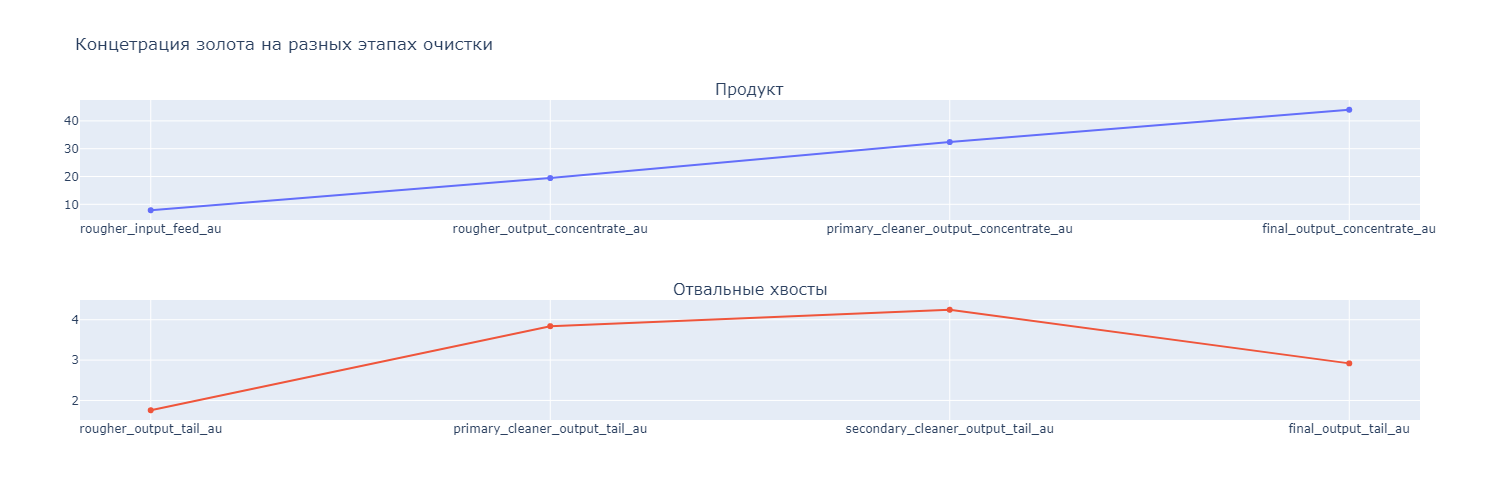

In [20]:
fig = make_subplots(rows=2, cols=1, subplot_titles=['Продукт', 'Отвальные хвосты'])

fig.add_trace(go.Scatter(y=au_concentrate.mean(),
                         x=au_concentrate.columns), 
              row=1, col=1
             )

fig.add_trace(go.Scatter(y=au_tail_concentrate.mean(), 
                         x=au_tail_concentrate.columns), 
              row=2, col=1
             )


fig.update_layout(title='Концетрация золота на разных этапах очистки', 
                  showlegend=False,
                  height = 500,
                  width = 1500
                  )

fig.show('png')

Наибольшее количество серебра в продукте наблюдается после процедуры флотации, далее концентрация снижается с каждым этапом. В отвальных хвостах содержание серебра достигает пика после первичной очистки, далее снижается.

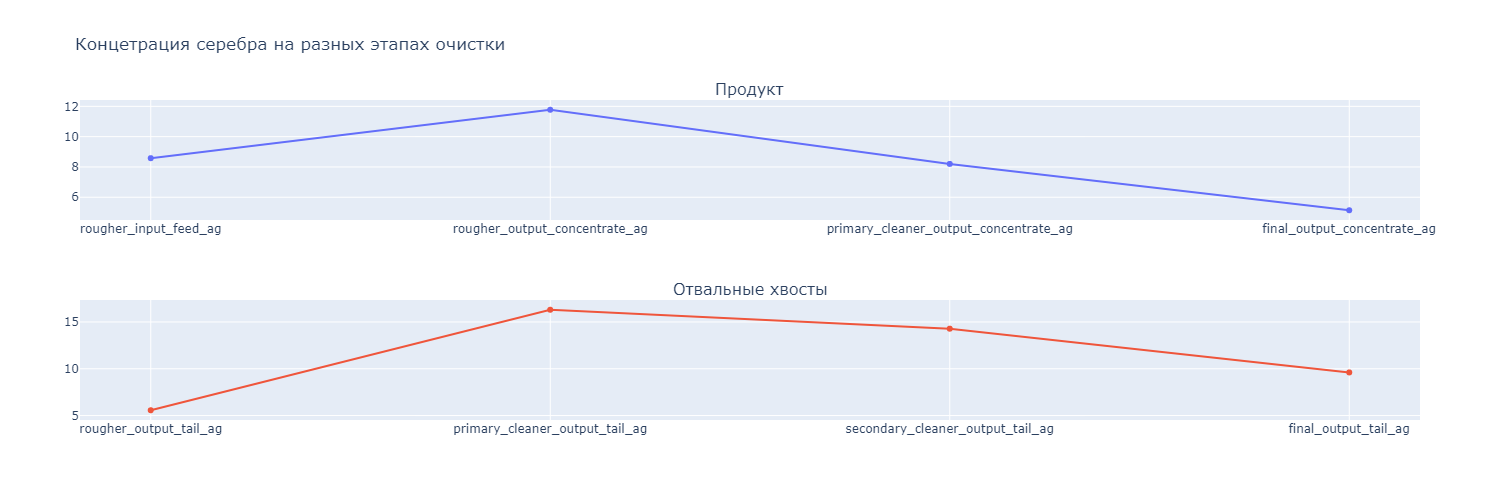

In [21]:
fig = make_subplots(rows=2, cols=1, subplot_titles=['Продукт', 'Отвальные хвосты'])

fig.add_trace(go.Scatter(y=ag_concentrate.mean(),
                         x=ag_concentrate.columns),
              row=1, col=1
             )

fig.add_trace(go.Scatter(y=ag_tail_concentrate.mean(),
                         x=ag_tail_concentrate.columns),
              row=2, col=1
             )


fig.update_layout(title='Концетрация серебра на разных этапах очистки',
                  showlegend=False,
                  height = 500,
                  width = 1500
                  )

fig.show('png')

Концентрация свинца растет с каждым этапом очистки, достигая максимальных значений после всех этапов. В отвальных хвостах же количество свинца до вторичной очистки растет, далее снижается.

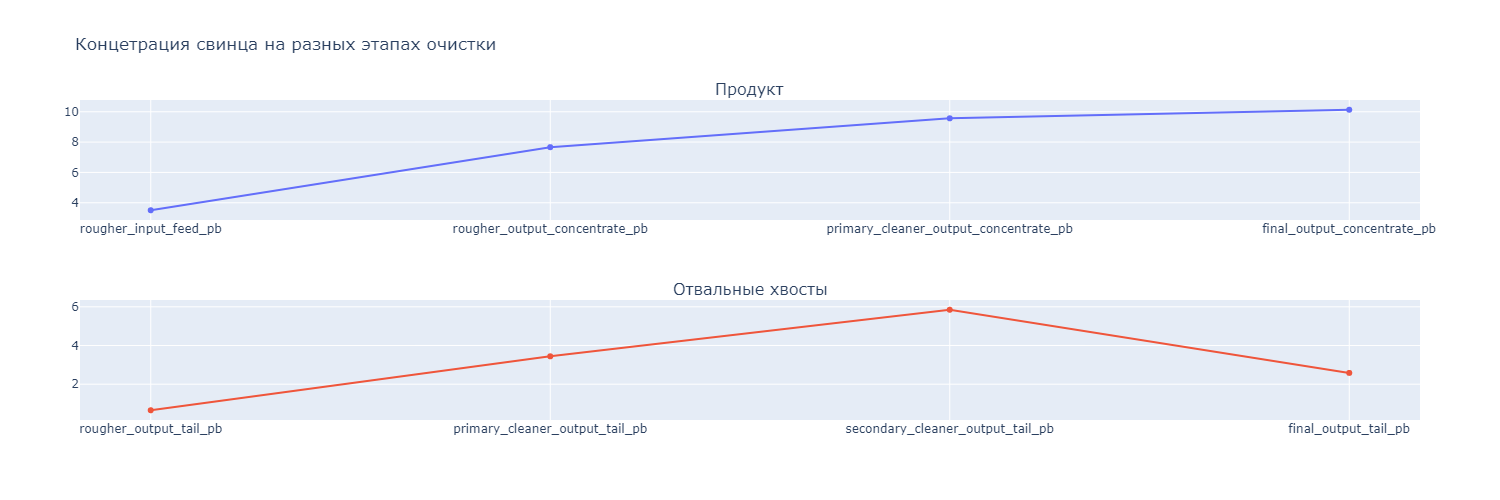

In [22]:
fig = make_subplots(rows=2, cols=1, subplot_titles=['Продукт', 'Отвальные хвосты'])

fig.add_trace(go.Scatter(y=pb_concentrate.mean(), 
                         x=pb_concentrate.columns),
              row=1, col=1
             )

fig.add_trace(go.Scatter(y=pb_tail_concentrate.mean(),
                         x=pb_tail_concentrate.columns),
              row=2, col=1
             )


fig.update_layout(title='Концетрация свинца на разных этапах очистки',
                  showlegend=False,
                  height = 500,
                  width = 1500)

fig.show('png')

### Распределение гранул сырья на тестовой и обучающей выборках

Перед обучением модели необходимо сравнить распределения размера гранул в тестовой и обучающих выборках.

Сперва посмотрим, в каких колонках собрана эта информация.

In [23]:
for col in df_full.columns:
    if 'feed_size' in col:
        print(col)

primary_cleaner_input_feed_size
rougher_input_feed_size


Сравним распределения значений в указанных колонках между датафреймами df_train и df_test.

На гистограммах видно, что распределения близки к нормальным, а также, что данные в поле `rougher_input_feed_size` имеют сильную скошенность вправо. По графикам можно сделать вывод, что распределения обоих датасетов схожи.

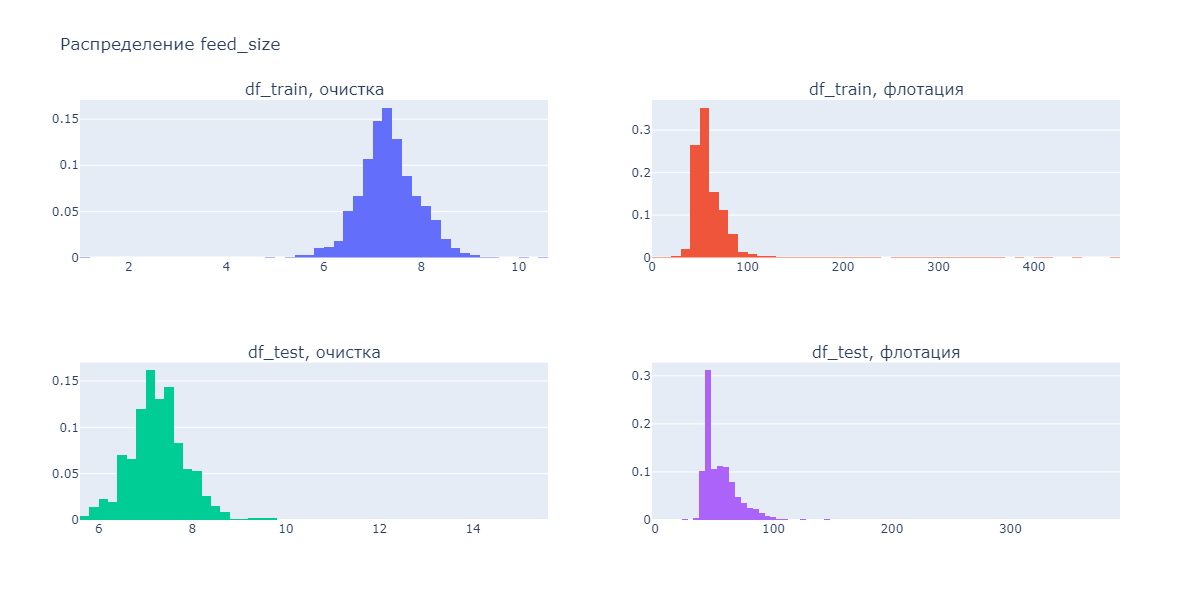

In [24]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['df_train, очистка',
                                    'df_train, флотация',
                                    'df_test, очистка',
                                    'df_test, флотация']
                   )

fig.add_trace(go.Histogram(x=df_train['primary_cleaner_input_feed_size'], 
                           nbinsx=80,
                           histnorm='probability'),
              row=1, col=1
             )

fig.add_trace(go.Histogram(x=df_train['rougher_input_feed_size'], 
                           nbinsx=80,
                           histnorm='probability'),
              row=1, col=2
             )

fig.add_trace(go.Histogram(x=df_test['primary_cleaner_input_feed_size'],
                           nbinsx=80,
                           histnorm='probability'),
              row=2, col=1
             )

fig.add_trace(go.Histogram(x=df_test['rougher_input_feed_size'],
                           nbinsx=80,
                           histnorm='probability'),
              row=2, col=2
             )

fig.update_layout(title='Распределение feed_size', 
                  showlegend=False,
                  height=600,
                  width=1200
                 )

fig.show('png')

### Суммарная концентрация веществ на разных этапах

Также изучим суммарную концентрацию золота, серебра и свинца на разных этапах очистки. 
Для этого сложим концентрации всех металлах на разных стадиях очистки и выведем гистограммы суммарных распределений.

In [25]:
df_train['final_output_concentrate_all'] = (df_train['final_output_concentrate_au'] + 
                                               df_train['final_output_concentrate_ag'] +
                                               df_train['final_output_concentrate_pb']
                                              )

df_train['primary_cleaner_output_concentrate_all'] = (df_train['primary_cleaner_output_concentrate_au'] + 
                                               df_train['primary_cleaner_output_concentrate_ag'] +
                                               df_train['primary_cleaner_output_concentrate_pb']
                                              )

df_train['rougher_input_feed_all'] = (df_train['rougher_input_feed_au'] + 
                                               df_train['rougher_input_feed_ag'] +
                                               df_train['rougher_input_feed_pb']
                                              )

df_train['rougher_output_concentrate_all'] = (df_train['rougher_output_concentrate_au'] + 
                                               df_train['rougher_output_concentrate_ag'] +
                                               df_train['rougher_output_concentrate_pb']
                                              )

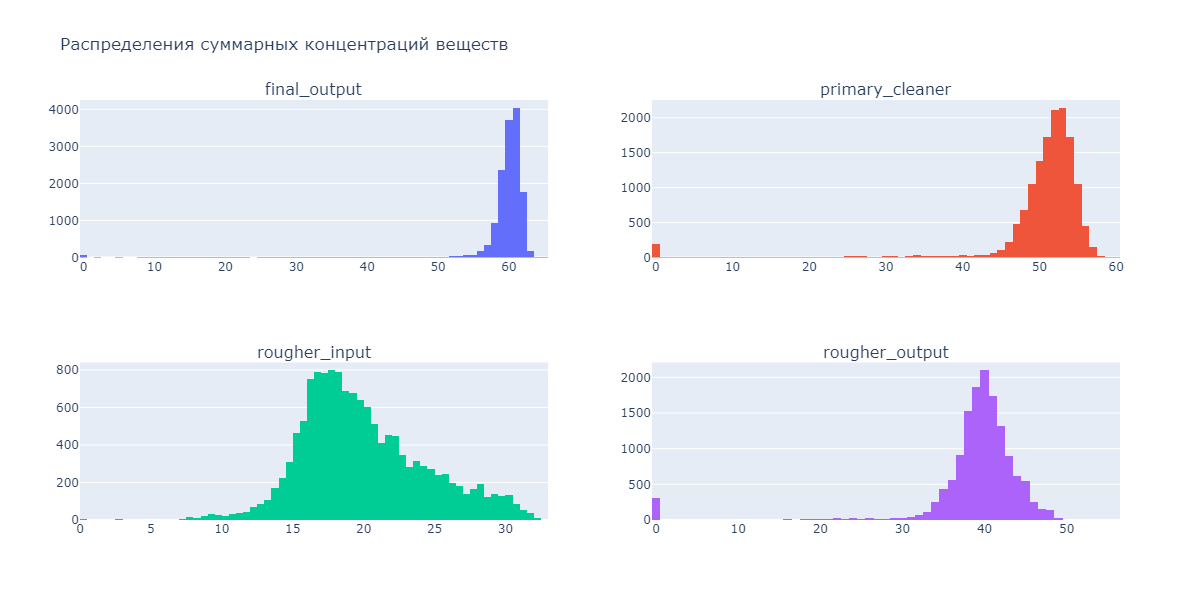

In [26]:
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=['final_output',
                                    'primary_cleaner',
                                    'rougher_input',
                                    'rougher_output']
                   )

fig.add_trace(go.Histogram(x=df_train['final_output_concentrate_all'], 
                           nbinsx=80),
              row=1, col=1
             )

fig.add_trace(go.Histogram(x=df_train['primary_cleaner_output_concentrate_all'], 
                           nbinsx=80),
              row=1, col=2
             )

fig.add_trace(go.Histogram(x=df_train['rougher_input_feed_all'],
                           nbinsx=80),
              row=2, col=1
             )

fig.add_trace(go.Histogram(x=df_train['rougher_output_concentrate_all'],
                           nbinsx=80),
              row=2, col=2
             )

fig.update_layout(title='Распределения суммарных концентраций веществ', 
                  showlegend=False,
                  height=600,
                  width=1200)

fig.show('png')

Удалим явные выбросы.

In [27]:
df_train = df_train.query('(final_output_concentrate_all > 1) and (primary_cleaner_output_concentrate_all > 1) and (rougher_input_feed_all > 5) and(rougher_output_concentrate_all > 1)')

Проверим, какой процент данных было потеряно после очистки. 

In [28]:
df_train_after = df_train.shape[0]

print(round((df_train_before-df_train_after)/df_train_before, 2))

0.04


Удалим новые поля, т.к. мы не можем их использовать при моделировании.

In [29]:
df_train = df_train.drop(['final_output_concentrate_all',
                          'primary_cleaner_output_concentrate_all',
                          'rougher_input_feed_all',
                          'rougher_output_concentrate_all'
                         ], axis=1)

## Построение модели

### Подготовка

Перед тем, как приступить с обучению моделей, необходимо подготовить данные.

Сначала выделим фичи, которые нужны для предсказания эффективности очистки концентрата на каждом из этапов.

In [30]:
# выделяем поля, относящиеся к этапу флотации
# и которые есть в тестовом датасете
rough_cols = []

for col in df_train.columns.to_list():
    if ('rougher' in col) & (col not in missing_cols):
        rough_cols.append(col)

Выделим отдельно фичи и целевой признак. В процессе из обучающего датасета уберем признаки, которых нет в тестовом датасете, т.к. их нельзя использовать при обучении.

In [31]:
# мы прогнозируем эффективность обогащения чернового и финального концентрата,
# поэтому создаем 2 отдельные обучающие выборки

# для первого этапа берем фичи только первого этапа
features_train_rougher = df_train[rough_cols]
# для второго этапа берем фичи двух этапов
features_train_final = df_train.drop(missing_cols, axis=1).drop('date', axis=1)
target_train_rougher = df_train['rougher_output_recovery']
target_train_final = df_train['final_output_recovery']

features_test_rougher = df_test[rough_cols]
features_test_final = df_test.drop('date', axis=1)
target_test_rougher = df_test.merge(df_full[['date', 'rougher_output_recovery',]], on='date', how='left')['rougher_output_recovery']
target_test_final = df_test.merge(df_full[['date', 'final_output_recovery']], on='date', how='left')['final_output_recovery']

Пишем функцию для вычисления sMAPE. Итоговая метрика рассчитывается на основе метрик каждого из этапов.

In [32]:
def smape(real, pred):
    return 1/len(real) * sum(2 * abs(real-pred) / (abs(real) + abs(pred))*100)

def smape_final(rougher, final):
    return rougher*0.25 + final*0.75

smape_scorer = make_scorer(smape, greater_is_better=False)

### Обучение моделей

Обучим и сравним 3 модели: DecisionTree, RandomForest, LinearRegression. Выберем наилучшую модель на основе нашей метрики.

#### DecisionTreeRegressor

Для подбора максимальной глубины решающего дерева используем GridSearchCV. Отдельно обучим модель для чернового и итогового продуктов.

In [33]:
class dt_model:
    def __init__(self):
        self.rougher_model = DecisionTreeRegressor(random_state=0)
        self.final_model = DecisionTreeRegressor(random_state=0)
    
    def fit(self, x_train_rougher, x_train_final, y_train_rougher, y_train_final, parameters):

        # модель для этапа флотации
        self.rougher_model = GridSearchCV(self.rougher_model, parameters, cv=8, scoring=smape_scorer)
        self.rougher_model.fit(x_train_rougher, y_train_rougher)

        self.rougher_score = self.rougher_model.best_score_

        print('SMAPE rougher:', self.rougher_score)

        # модель для финального этапа очистки
        self.final_model = GridSearchCV(self.final_model, parameters, cv=8, scoring=smape_scorer)
        self.final_model.fit(x_train_final, y_train_final)

        self.final_score = self.final_model.best_score_

        print('SMAPE final:', self.final_score)

        # итоговая метрика
        dt_score = smape_final(self.rougher_score, self.final_score)
        print('Итоговый SMAPE дерева:', dt_score)

    def test(self, x_test_rougher, x_test_final, y_test_rougher, y_test_final):
        self.test_predictions_rougher = self.rougher_model.predict(x_test_rougher)
        self.test_predictions_final = self.final_model.predict(x_test_final)

        self.test_rougher_score = smape(y_test_rougher, self.test_predictions_rougher)
        self.test_final_score = smape(y_test_final, self.test_predictions_final)

        total_score = smape_final(self.test_rougher_score, self.test_final_score)
        
        return total_score


In [34]:
dt = dt_model()
params = {'max_depth':range(1, 20)}

dt.fit(features_train_rougher, features_train_final, target_train_rougher, target_train_final, params)

SMAPE rougher: -6.9636328147111595
SMAPE final: -9.259266183762303
Итоговый SMAPE дерева: -8.685357841499517


#### RandomForestRegressor

RandomForest обучим с помощью GridSearchCV. Также вычислим SMAPE для итоговой модели.

In [35]:
class rf_model:
    def __init__(self):
        self.rougher_model = RandomForestRegressor(random_state=0)
        self.final_model = RandomForestRegressor(random_state=0)
    
    def fit(self, x_train_rougher, x_train_final, y_train_rougher, y_train_final, parameters):

        # модель для этапа флотации
        self.rougher_model = GridSearchCV(self.rougher_model, parameters, cv=8, scoring=smape_scorer, n_jobs=4)
        self.rougher_model.fit(x_train_rougher, y_train_rougher)

        self.rougher_score = self.rougher_model.best_score_

        print('SMAPE rougher:', self.rougher_score)

        # модель для финального этапа очистки
        self.final_model = GridSearchCV(self.final_model, parameters, cv=8, scoring=smape_scorer, n_jobs=4)
        self.final_model.fit(x_train_final, y_train_final)

        self.final_score = self.final_model.best_score_

        print('SMAPE final:', self.final_score)

        # итоговая метрика
        rf_score = smape_final(self.rougher_score, self.final_score)
        print('Итоговый SMAPE рандомного леса:', rf_score)

    def test(self, x_test_rougher, x_test_final, y_test_rougher, y_test_final):
        self.test_predictions_rougher = self.rougher_model.predict(x_test_rougher)
        self.test_predictions_final = self.final_model.predict(x_test_final)

        self.test_rougher_score = smape(y_test_rougher, self.test_predictions_rougher)
        self.test_final_score = smape(y_test_final, self.test_predictions_final)

        total_score = smape_final(self.test_rougher_score, self.test_final_score)
        
        return total_score


In [36]:
rf = rf_model()
params = {'max_depth':range(1, 20), 'n_estimators':range(20, 101, 10)}

rf.fit(features_train_rougher, features_train_final, target_train_rougher, target_train_final, params)

SMAPE rougher: -6.520006265163042
SMAPE final: -8.978716721995234
Итоговый SMAPE рандомного леса: -8.364039107787185


#### LinearRegression

Третьим алгоритмом возьмем линейную регрессию, для которой также вычислим SMAPE.

In [37]:
class lr_model:
    def __init__(self):
        self.rougher_model = LinearRegression()
        self.final_model = LinearRegression()
    
    def fit(self, x_train_rougher, x_train_final, y_train_rougher, y_train_final):

        # модель для этапа флотации
        self.rougher_score = cross_val_score(self.rougher_model, x_train_rougher, y_train_rougher, scoring=smape_scorer, cv=8).mean()

        print('SMAPE rougher:', self.rougher_score)

        # модель для финального этапа очистки
        self.final_score = cross_val_score(self.final_model, x_train_final, y_train_final, scoring=smape_scorer, cv=8).mean()

        print('SMAPE final:', self.final_score)

        # итоговая метрика
        self.lr_score = smape_final(self.rougher_score, self.final_score)
        print('Итоговый SMAPE линейной регрессии', self.lr_score)

    def test(self, x_test_rougher, x_test_final, y_test_rougher, y_test_final):
        self.test_predictions_rougher = self.rougher_model.predict(x_test_rougher)
        self.test_predictions_final = self.final_model.predict(x_test_final)

        self.test_rougher_score = smape(y_test_rougher, self.test_predictions_rougher)
        self.test_final_score = smape(y_test_final, self.test_predictions_final)

        total_score = smape_final(self.test_rougher_score, self.test_final_score)
        
        return total_score

In [38]:
lr = lr_model()

lr.fit(features_train_rougher, features_train_final, target_train_rougher, target_train_final)

SMAPE rougher: -6.169900863389286
SMAPE final: -10.517520804297812
Итоговый SMAPE линейной регрессии -9.430615819070681


Таким образом, наилучший результат на нашей выборке получила модель решающего дерева..

## Использование модели на тестовой выборке

Протестируем модель на тестовой выборке.

In [39]:
rf.test(features_test_rougher, features_test_final, target_test_rougher, target_test_final)

9.356480738867951

## Сравнение с DummyRegressor

Сравним итоговый результат модели с результатом константной модели.

In [40]:
base_model_rougher = DummyRegressor(strategy='median')
base_model_final = DummyRegressor(strategy='median')

base_model_rougher.fit(features_train_rougher, target_train_rougher)
base_model_rougher_predict = base_model_rougher.predict(features_test_rougher)

base_model_final.fit(features_train_final, target_train_final)
base_model_final_predict = base_model_final.predict(features_test_final)

In [42]:
base_model_score = smape_final(smape(base_model_rougher_predict, target_test_rougher), 
                               smape(base_model_final_predict, target_test_final)
                              )
print(base_model_score)

9.45034819345668


sMAPE DummyRegressor получился больше, таким образом, наша модель показывает лучшие результаты.

## Итоги

Мы проверили предобработку и изучили данные по очистке золота и обучили модель, которая предсказывает коэффициент очистки золота.

Описали концентрацию золота, серебра и свинца на разных этапах очистки, а также суммарную концентрацию этих веществ.

Наилучшие результаты показал алгоритм RandomForest. sMAPE этой модели на тестовой выборке составил 9.36.